In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm
import cv2
import os
from PIL import Image, ImageOps

In [46]:
def change_size(image, target_size, pad_value=0):
    
    target_h, target_w = target_size
    img_h, img_w = image.shape[:2]
    image = cv2.resize(image, (660, 660 * img_h // img_w))

    # crop
    start_x = max(0, (img_w - target_w) // 2)
    start_y = max(0, (img_h - target_h) // 2)
    end_x = start_x + min(target_w, img_w)
    end_y = start_y + min(target_h, img_h)

    cropped = image[start_y:end_y, start_x:end_x]

    # pad
    pad_h = max(0, target_h - cropped.shape[0])
    pad_w = max(0, target_w - cropped.shape[1])
    
    pad_top = pad_h // 2
    pad_bottom = pad_h - pad_top
    pad_left = pad_w // 2
    pad_right = pad_w - pad_left

    if image.ndim == 3:
        padding = ((pad_top, pad_bottom), (pad_left, pad_right), (0, 0))
    else:
        padding = ((pad_top, pad_bottom), (pad_left, pad_right))

    padded = np.pad(cropped, padding, mode='constant', constant_values=pad_value)

    return padded

In [47]:
file_paths = ["data/images/" + s for s in os.listdir("data/images")]

(528, 660, 3)


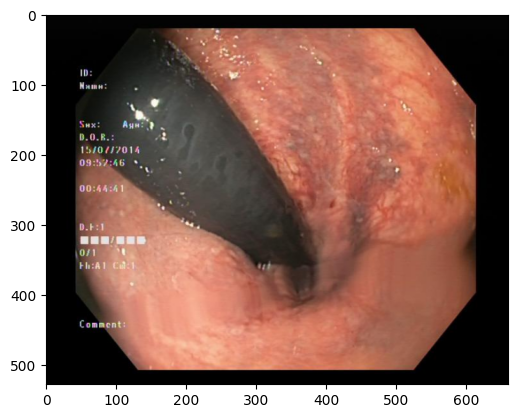

In [49]:
p = file_paths[5]

im = cv2.imread(p)
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
h, w = im.shape[:2:]
im = cv2.resize(im, (660, 660 * h // w))
# im = change_size(im, (660, 660))
print(im.shape)
plt.imshow(im)
plt.show()